In [1]:
# PART 1
# Importing required packages 
import pandas as pd 
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use("fivethirtyeight") # Style sheet to make the plots look a little nicer!
import warnings
warnings.filterwarnings('ignore')

In [2]:
# PART 2
# Airbnb Dataset Preparation, Transformation and Visualization

# Reading the Airbnb Listings file containing the header and retriving the columns
temp_df=pd.read_csv('C:\Adith\Capital One Project/listings_file_1.csv',encoding='ISO-8859-1')
data_cols=list(temp_df.columns)


# Reading the listings file 1 without the header, and skipping the first row of data1, which is the header content. 
data1=pd.read_csv('C:\Adith\Capital One Project/listings_file_1.csv',encoding='ISO-8859-1',header=None,skiprows=1)


# The last row of all the files containing unwanted text which looks like this => {"mode":"full" isActive:false}
# So, removed the last row of all the files. 
data1.drop(data1.tail(1).index,inplace=True)


path='C:\Adith\Capital One Project'# Change the path to where the data files are stored

listings=glob.glob(path + '/listings*.csv') # Assuming that all the Airbnb file names start with 'listings' and 
                                            # end with an extension '.csv'

lst=[data1] # A list to store all Airbnb files that needs to be concatenated
print(f"{path}\listings_file_1.csv is of shape{data1.shape}")

for i in range(1,len(listings)):
    data=pd.read_csv(listings[i],encoding='ISO-8859-1',header=None)
    data.drop(data.tail(1).index,inplace=True)
    lst.append(data)
    print(f"{listings[i]} is of shape{data.shape}")
    
data=pd.concat(lst,axis=0) # The dataframe 'data' is a concatenation of all the Airbnb files
data.reset_index(drop=True,inplace=True) # Resetting the index so that the index values remain unique after concatenation
data.columns=data_cols # Setting the columns of 'data'


# Our dataset contains 1 row of data for Uruguay
# Deleting data for country, Uruguay
#data.country.unique()
data.drop(data[data.country=='Uruguay'].index,axis=0,inplace=True)


# Since, we are interested in short-term rentals for 2-bedroom properties only, retaining the data only for 2-bedroom
data=data[data['bedrooms']==2]


# Converting the price column from object datatype to float
#data.price.dtype
def funct_replac(price):
    price=price.strip().replace("$","").replace(",","")
    return price   

data["price"]=data["price"].apply(funct_replac)
data['price']=data['price'].astype(np.float64)
#data['price'].dtype


# Listing out the required columns and retaining data only for those columns
reqd_data_cols=['name','summary','price','neighbourhood_cleansed','neighbourhood_group_cleansed', 
                'city', 'state', 'zipcode', 'room_type','latitude', 'longitude',
                'availability_30','availability_60','availability_90','number_of_reviews', 'review_scores_rating', 
                'review_scores_value']
data=data[reqd_data_cols]


## Data Imputation
print()
print("To display NaN/Null values in our dataset:")
print(data.isnull().sum())

# Removing rows for blank Zipcodes
data.drop(data[data['zipcode'].isna()].index,axis=0,inplace=True)
data['zipcode']=data['zipcode'].astype(str)


# Retaining 5-digit Zipcodes and deleting the rest
# print()
# print("Zipcodes containing various lengths:")
# print(data['zipcode'].str.len().unique())
def funct_replac(zipcode):
    zipcode=zipcode.strip().replace(".0","")
    return zipcode  

data["zipcode"]=data["zipcode"].apply(funct_replac)
data=data[data['zipcode'].str.len()==5.0]
# print()
# print(" Zipcodes' Digit Length:")
# print(data['zipcode'].str.len().unique())

# Performing Data Imputation by replacing the NaN values of numerical variables with mean() 
# and NaN values of categorical variables with Blank ("")
numerical_cols=[]
categorical_cols=[]

for col in data.columns:
    if data[col].dtype=='float64':
        numerical_cols.append(col)
    elif data[col].dtype=='object':
        categorical_cols.append(col)
        
for col in numerical_cols:
    if data[col].isnull().sum()!=0:
        data[col].fillna(data[col].mean(),inplace=True)
        
for col in categorical_cols:
    if data[col].isnull().sum()!=0:
        data[col].fillna("",inplace=True) 
print()
print("After data imputation, there are no NaN/Null values:")
print(data.isnull().sum()) # To check if there are any NaN/Null values in our dataset 'data' 

C:\Adith\Capital One Project\listings_file_1.csv is of shape(9999, 95)
C:\Adith\Capital One Project\listings_file_2.csv is of shape(10000, 95)
C:\Adith\Capital One Project\listings_file_3.csv is of shape(10000, 95)
C:\Adith\Capital One Project\listings_file_4.csv is of shape(10754, 95)

To display NaN/Null values in our dataset:
name                               1
summary                          208
price                              0
neighbourhood_cleansed             0
neighbourhood_group_cleansed       0
city                               5
state                              0
zipcode                           62
room_type                          0
latitude                           0
longitude                          0
availability_30                    0
availability_60                    0
availability_90                    0
number_of_reviews                  0
review_scores_rating            1020
review_scores_value             1029
dtype: int64

After data imputation, the


Distribution Plot for numerical variables, before the removal of Outliers:


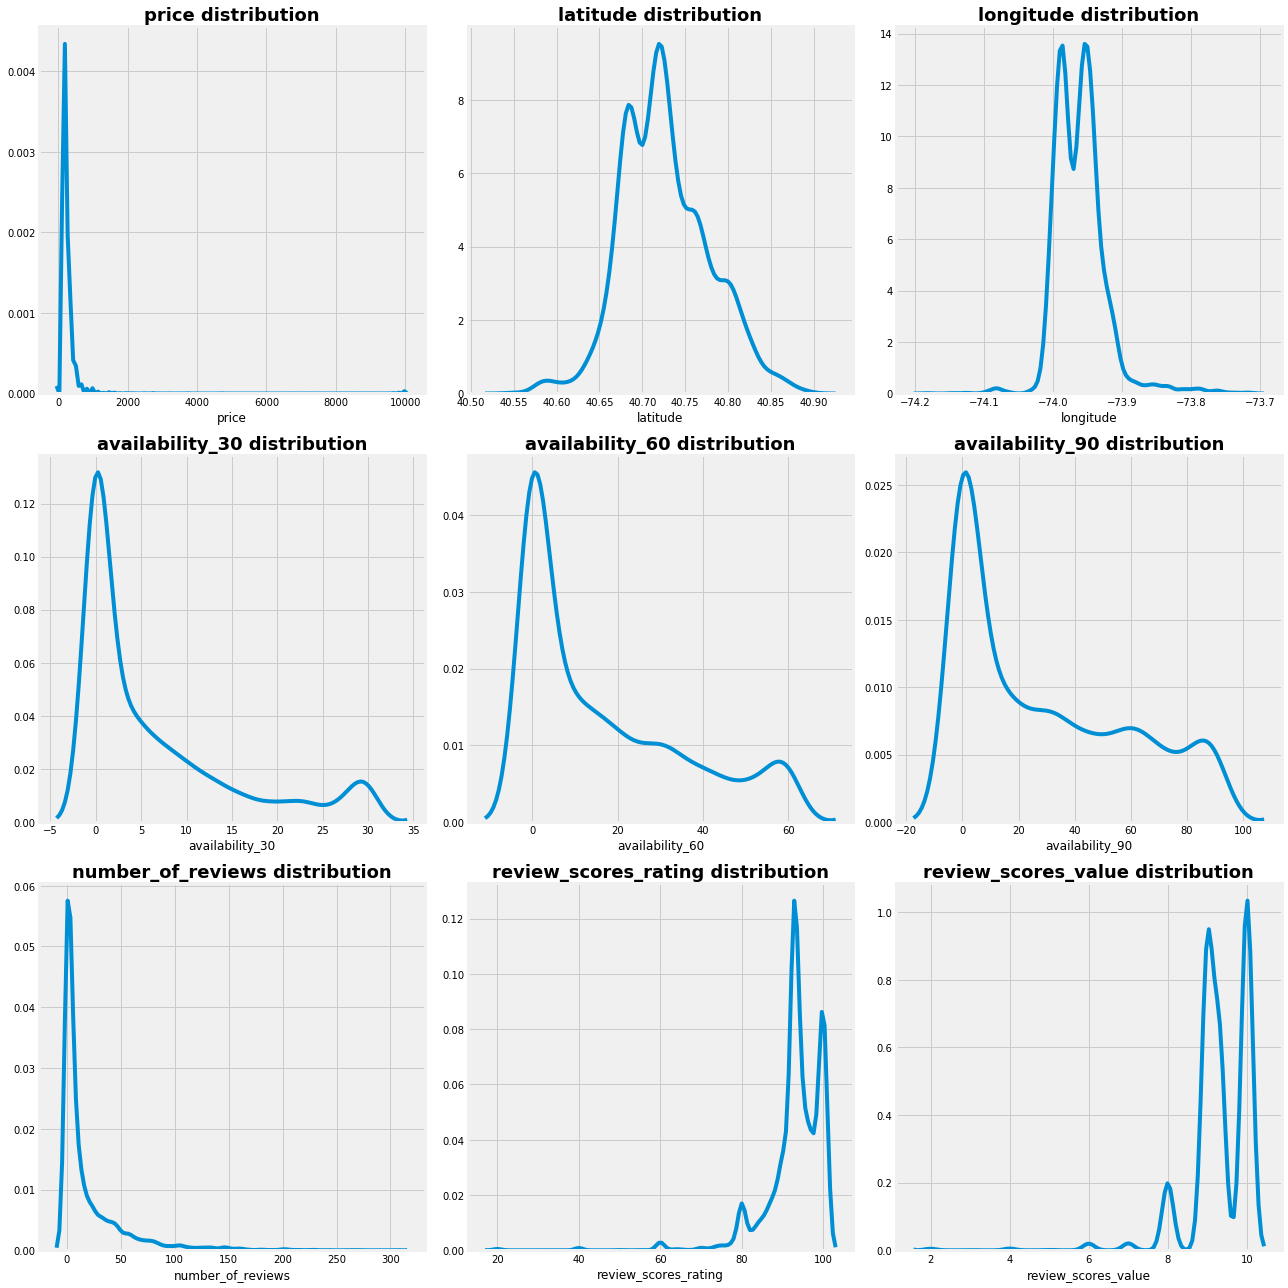

In [3]:
# PART 3
# Airbnb Dataset
# Exploratory Data Analysis to identify and remove Outliers

# Distribution Plot for numerical variables 
print()
print("Distribution Plot for numerical variables, before the removal of Outliers:")
fig,axes=plt.subplots(nrows=3,ncols=3,figsize=(18,18))
count=0

for row in axes:
    for col in row:
        sns.distplot(data[numerical_cols[count]],ax=col,hist=False)
        col.set_title(numerical_cols[count]+' distribution', fontweight='bold',fontsize=18)
        count+=1
plt.tight_layout()
# path='C:\Adith\Capital One Project'# Change the path to where the data files are stored
# fig.savefig(path+"/Distribution Plot Before Outliers Removal.png",dpi=200)

###### From the plot above, since majority of the data contains prices (per night) below 1000 (USD), 
###### we can remove the data for prices that are above 1000 (USD), considering them as outliers.

###### Also, as per the plot, number_of_reviews is densely populated between 0 and 150; 
###### So values outside this range can be considered as Outliers 


Numerical Distribution Plot, after the removal of Outliers:


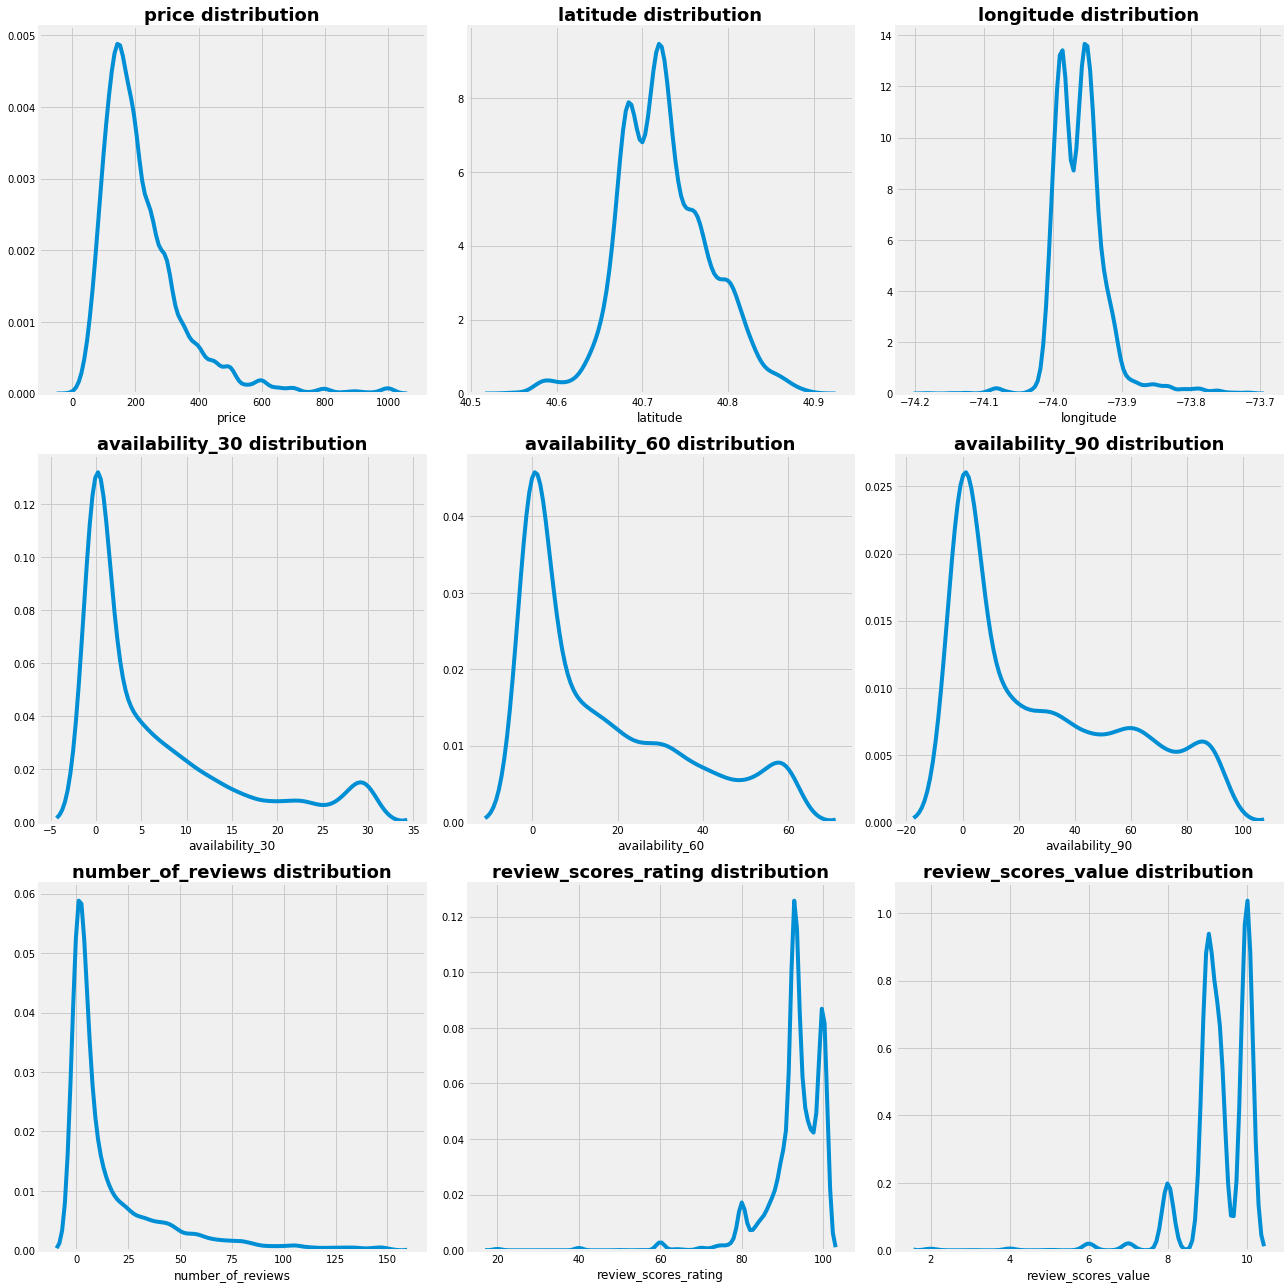

In [4]:
# PART 4
# Airbnb Dataset
data.drop(data[data["price"]>1000].index,axis=0,inplace=True) # Deleting price greater than $1000

data.drop(data[data['number_of_reviews']>150].index,axis=0,inplace=True) # Deleting number_of_reviews greater than 150

# After Removal of Outliers, Numerical Distribution plot is as below:
print()
print("Numerical Distribution Plot, after the removal of Outliers:")
fig,axes=plt.subplots(nrows=3,ncols=3,figsize=(18,18))
count=0

for row in axes:
    for col in row:
        sns.distplot(data[numerical_cols[count]],ax=col,hist=False)
        col.set_title(numerical_cols[count]+' distribution', fontweight='bold',fontsize=18)
        count+=1
plt.tight_layout()
# path='C:\Adith\Capital One Project'# Change the path to where the data files are stored
# fig.savefig(path+"/Distribution Plot After Outliers Removal.png",dpi=200)


Distribution of property listings for 5 boroughs by Latitude & Longitude:


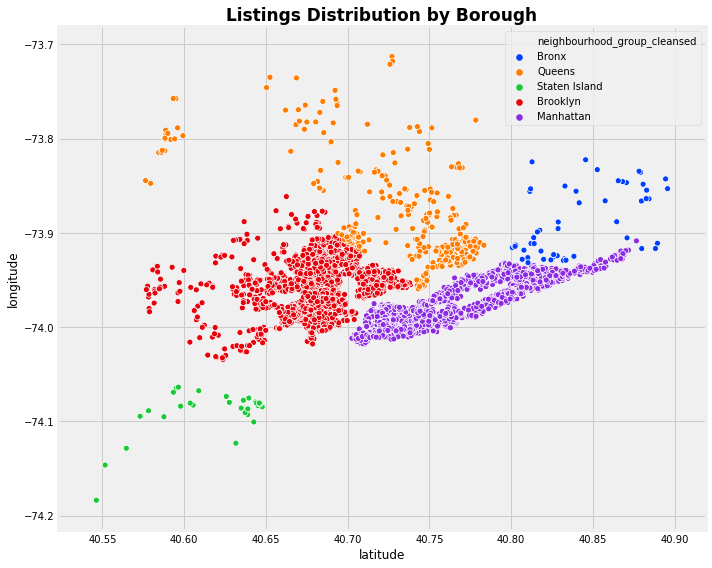

In [5]:
# PART 5
# Airbnb Dataset
######## Data Visualization
#Distribution of property listings for 5 boroughs by Latitude & Longitude
print()
print("Distribution of property listings for 5 boroughs by Latitude & Longitude:")
fig,axes=plt.subplots(figsize=(10,8))
sns.scatterplot(data.latitude,data.longitude,hue=data.neighbourhood_group_cleansed,ax=axes,palette='bright')
axes.set_title("Listings Distribution by Borough",fontweight='bold',fontsize=17)
plt.tight_layout()
# path='C:\Adith\Capital One Project'# Change the path to where the data files are stored
# fig.savefig(path+"/Listings Distribution by Borough.png",dpi=200)

###### Observations from the above plot: 
###### From the above plot, we can observe that Airbnb property listings are high in Brooklyn and Manhattan.
###### This is supported by the fact that both Brooklyn and Manhattan are the two most populous of the 5 boroughs. 
###### So, it's highly likely that the most lucrative zip code(s) belongs to either Brooklyn or Manhattan 

In [6]:
# PART 6
# Airbnb Dataset
######## Data Calculation
## Calculating Number of Listings for each Zipcode

listings_zipcode=data.zipcode.value_counts()

num_listings=pd.DataFrame({'zipcode':listings_zipcode.index,'number_of_listings':listings_zipcode.values})
#num_listings


## Calculating Total Number of Ratings for each zipcode

total_rating_zipcode=data["number_of_reviews"].groupby(data["zipcode"]).sum().reset_index()
#total_rating_zipcode

## Merge the above two dataframes

merged_data=pd.merge(num_listings,total_rating_zipcode,on='zipcode') # Merging two datasets by zipcode column
#merged_data.head(5)

## Calculating Price Per Year for each Zipcode

# Assuming Occupancy Rate to be 0.75 (75%), let's calculate the price made by each zipcode in 1 year.
# Then, for each zipcode, we can find the Return On Investment (ROI) and number of years required to 
# repay the price (Comparing Median Price & Price/year) 

data=data[["price","review_scores_rating"]].groupby(data["zipcode"]).mean().reset_index()
data[["price","review_scores_rating"]]=data[["price","review_scores_rating"]].round(0)

data['price_per_year']=data["price"]*365*0.75
data['price_per_year']=data['price_per_year'].round(0)


# Merging 'data' & 'merged_data' dataframes to retrieve the required columns
data_bnb = pd.merge(data,merged_data,on='zipcode') # Merging two datasets by zipcode column
data_bnb.rename(columns={"price":"price_mean","review_scores_rating":"review_ratings_mean"},inplace=True)
#data_bnb.shape # This is the final Airbnb dataset 'data_bnb' which has to be merged with zillow dataset once it's prepared.

print()
print(f"This is the final Airbnb dataset 'data_bnb' with shape {data_bnb.shape}:")
data_bnb.head(3)


This is the final Airbnb dataset 'data_bnb' with shape (148, 6):


,zipcode,price_mean,review_ratings_mean,price_per_year,number_of_listings,number_of_reviews
0,10001,407.0,93.0,111416.0,54,1218.0
1,10002,274.0,92.0,75008.0,162,3333.0
2,10003,290.0,92.0,79388.0,130,2800.0


In [7]:
# PART 7
# Zillow Dataset Preparation, Transformation and Calculation

# Reading the Zillow file(s) containing the header and retrieving the columns
df1=pd.read_csv('C:\Adith\Capital One Project/Zip_Zhvi_2bedroom.csv',encoding='latin_1')
df_col=list(df1.columns)


# Reading zillow file 1 (Zip_Zhvi_2bedroom.csv) without the header, and skipping the first row of df1, 
# which is the header content. 
df1=pd.read_csv('C:\Adith\Capital One Project/Zip_Zhvi_2bedroom.csv',header=None,skiprows=1,encoding='latin_1')

# The last row of all the files contain unwanted text which looks like this => {"mode":"full" isActive:false}
# So, removed the last row of all the files. 
df1.drop(df1.tail(1).index,axis=0,inplace=True)


path='C:\Adith\Capital One Project' # Change the path to where the data files are stored

zillow_files=glob.glob(path + '/Zip*.csv')  # Assuming that all the Zillow file names start with 'Zip' and 
                                            # end with an extension '.csv'

# The below few lines of code checks to see if there are more than one Zillow files present; 
# If so, then all the files will be concatenated into a single dataframe 'df_zlw'    
if len(zillow_files)==1:
    df_zlw=df1

elif len(zillow_files)>1:
    lst_df=[df1] # A list to store all Zillow files that needs to be concatenated
    print(f"{path}\Zip_Zhvi_2bedroom.csv is of shape{df1.shape}")
    
    for i in range(1,len(zillow_files)):
        data=pd.read_csv(zillow_files[i],encoding='ISO-8859-1',header=None)
        data.drop(data.tail(1).index,inplace=True)
        lst_df.append(data)
        print(f"{zillow_files[i]} is of shape{data.shape}")
    df_zlw=pd.concat(lst_df,axis=0) # The dataframe 'df_zlw' is a concatenation of all the Zillow files
    df_zlw.reset_index(drop=True, inplace=True) #Resetting the index so that index values remain unique after concatenation
    
df_zlw.columns=df_col # Setting the columns of 'df_zlw'


# In the below line, df_zlw.columns[-1] => Gives us the last column of our zillow dataset, 
# which is the latest year (06/2017) as per the dataset. 
# And, df_zlw.columns[-(12*5)] =>  Gives us the column of exactly 5 years (07/2012) prior to the latest year (06/2017)

# Using these two columns, we can calculate the Percentage Increase of the properties 
# for each Zipcode, over the period of 5 years 

reqd_cols=['RegionName','City','State','SizeRank',df_zlw.columns[-(12*5)],df_zlw.columns[-1]]
df_zlw=df_zlw[reqd_cols]

df_zlw=df_zlw[df_zlw['State']=='NY'] # Retaining data for State, NY
print()
print("There are no Null/Nan values:")
print(df_zlw.isnull().sum()) # To see if there any Null/Nan values

#Calculating the Percentage Increase for each Zipcode over the period of 5 years
df_zlw['Percent_Increase ('+'%)']=((df_zlw['2017-06'] - df_zlw["2012-07"])/(df_zlw["2012-07"]))*100
df_zlw['Percent_Increase ('+'%)']=df_zlw['Percent_Increase ('+'%)'].round(0)

df_zlw['RegionName']=df_zlw["RegionName"].apply(lambda x: str(x)) # Converting zipcodes to object datatype


# This is the final Zillow dataset 'df_zlw'
df_zlw=df_zlw[["RegionName","SizeRank","2017-06",'Percent_Increase ('+'%)']]
df_zlw.rename(columns={"RegionName":"zipcode","2017-06":"Median Price"},inplace=True)
print()
print(f"This is the final Zillow dataset 'df_zlw' with the shape {df_zlw.shape}:")
df_zlw.head(3)


There are no Null/Nan values:
RegionName    0
City          0
State         0
SizeRank      0
2012-07       0
2017-06       0
dtype: int64

This is the final Zillow dataset 'df_zlw' with the shape (475, 4):


,zipcode,SizeRank,Median Price,Percent_Increase (%)
0,10013,1744.0,3316500.0,25.0
1,10014,379.0,2491600.0,41.0
2,10011,15.0,2480400.0,60.0


In [8]:
# PART 8
# Final Dataset
# Combining two datasets (Airbnb & Zillow) to find the Top 3 Zipcodes
# for the real estate company to invest in!

df_final=pd.merge(data_bnb,df_zlw,on='zipcode') # Merging two datasets by zipcode column

# Calculating 'Years_Repay' => the number of years required to repay the 'Median Price' of each zipcode, 
# if invested in that zipcode
df_final["years_to_repay"]=(df_final["Median Price"]/df_final["price_per_year"]).round(1)

# Calculating the Return On Investment for each Zipcode
df_final["ROI ("+"%)"]=((df_final["price_per_year"]/df_final["Median Price"])*100).round(1)


## Data Analysis on the final merged dataset 'df_final' to gain valuable Zipcode insights

# Let's set some data constraints on important columns such as Percent_Increase, number_of_reviews, 
# review_ratings_mean, and ROI (%) as follows:

# DATA CONSTRAINTS :
# Percent_Increase => greater than 60%
# number_of_reviews => greater than 1500
# review_ratings_mean => greater than 94
# ROI (%) => above 6%


# We are looking for Zipcodes that satisfy atleast 3 of the above 4 constraints
# Top 3 Zipcodes, considering columns Percent_Increase, number_of_reviews, and review_ratings_mean.

df_final.sort_values(["Percent_Increase ("+"%)","number_of_reviews","review_ratings_mean","ROI ("+"%)"]
                     ,ascending=[False,False,False,False],inplace=True)
df_top_3_zipcodes=df_final[:3]
print()
print("Top 3 Zipcodes:")
df_top_3_zipcodes # This Dataframe gives us Top 3 Zipcodes 


Top 3 Zipcodes:


,zipcode,price_mean,review_ratings_mean,price_per_year,number_of_listings,number_of_reviews,SizeRank,Median Price,Percent_Increase (%),years_to_repay,ROI (%)
18,11217,215.0,95.0,58856.0,84,1573.0,1555.0,1302300.0,91.0,22.1,4.5
19,11231,203.0,94.0,55571.0,72,918.0,1817.0,1202900.0,78.0,21.6,4.6
17,11215,181.0,95.0,49549.0,140,1700.0,71.0,1070800.0,73.0,21.6,4.6


#### Highlighting the Data Constraints :
###### Percent_Increase => greater than 60%
###### number_of_reviews => greater than 1500
###### review_ratings_mean => greater than 94
###### ROI (%) => above 6%

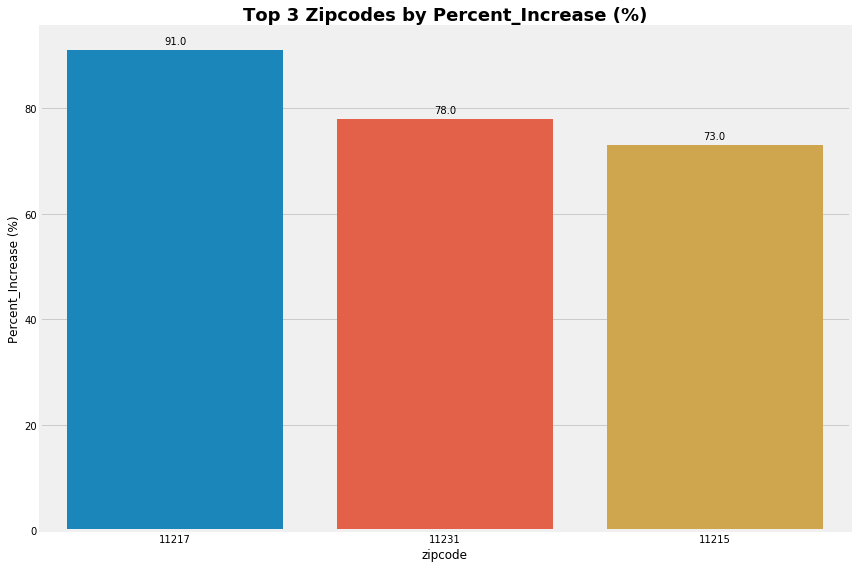

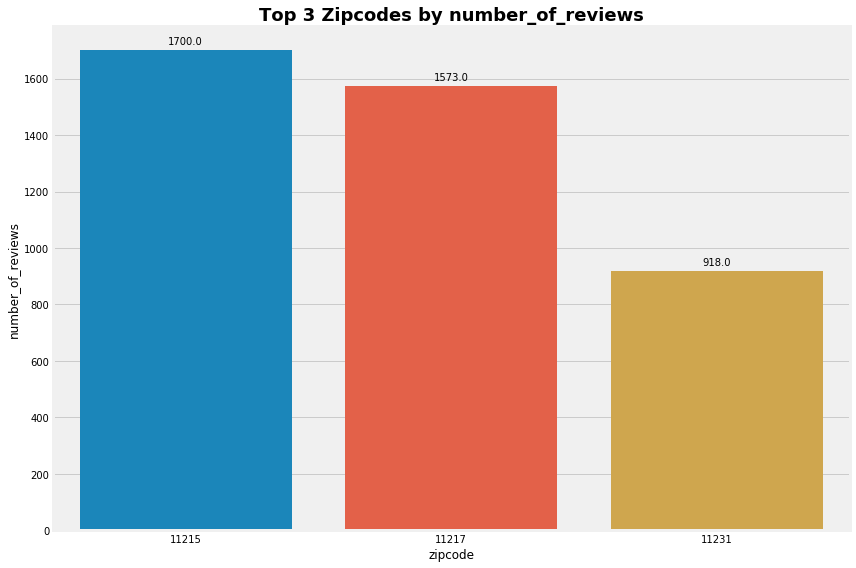

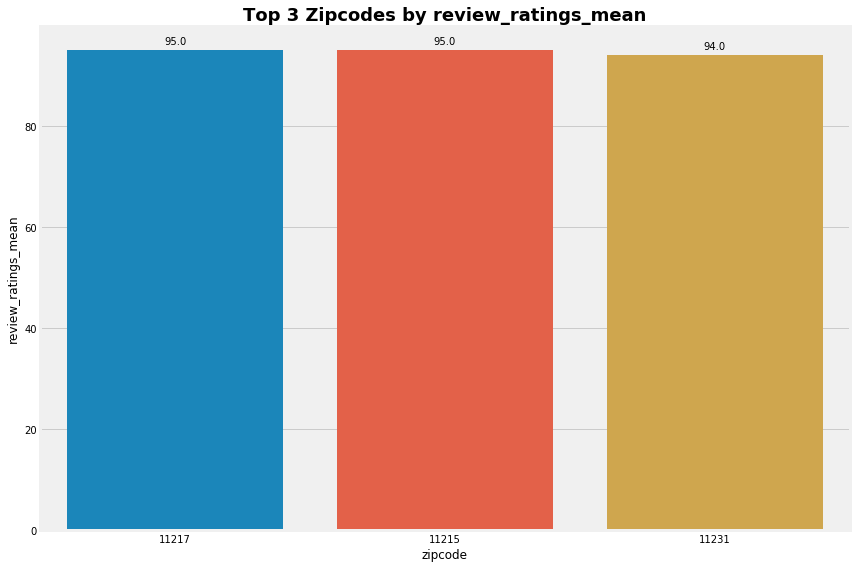

In [9]:
# PART 9
# Final Dataset
## Data Visualization on the Top 3 zipcodes, to check whether they satisfy the required data constraints

# Plot for Top 3 Zipcodes by Percent_Increase
fig, axes=plt.subplots(figsize=(12,8))
g=sns.barplot(df_top_3_zipcodes['zipcode'],df_top_3_zipcodes["Percent_Increase ("+"%)"],ax=axes,
            order=df_top_3_zipcodes.sort_values("Percent_Increase ("+"%)",ascending=False).zipcode)

for p in g.patches:
    g.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

axes.set_title("Top 3 Zipcodes by Percent_Increase ("+"%)",fontsize=18,fontweight='bold')
plt.tight_layout()
# path='C:\Adith\Capital One Project'# Change the path to where the data files are stored
# fig.savefig(path+"/Top 3 Zipcodes by Percent_Increase ("+"%).png",dpi=200)


# Plot for Top 3 Zipcodes by number_of_reviews
fig, axes=plt.subplots(figsize=(12,8))
g=sns.barplot(df_top_3_zipcodes['zipcode'],df_top_3_zipcodes["number_of_reviews"],ax=axes,
            order=df_top_3_zipcodes.sort_values("number_of_reviews",ascending=False).zipcode)

for p in g.patches:
    g.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

axes.set_title("Top 3 Zipcodes by number_of_reviews",fontsize=18,fontweight='bold')
plt.tight_layout()
# fig.savefig(path+"/Top 3 Zipcodes by number_of_reviews.png",dpi=200)


# Plot for Top 3 Zipcodes by review_ratings_mean
fig, axes=plt.subplots(figsize=(12,8))
g=sns.barplot(df_top_3_zipcodes['zipcode'],df_top_3_zipcodes["review_ratings_mean"],ax=axes,
            order=df_top_3_zipcodes.sort_values("review_ratings_mean",ascending=False).zipcode)

for p in g.patches:
    g.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

axes.set_title("Top 3 Zipcodes by review_ratings_mean",fontsize=18,fontweight='bold')
plt.tight_layout()
# fig.savefig(path+"/Top 3 Zipcodes by review_ratings_mean.png",dpi=200)

###### Conclusion from the above visualizations:
###### From the above 3 plots, Zipcodes 11217 and 11215 satisfies 3 out of the 4 data constraints. 
###### Therefore, Zipcodes 11217 and 11215 are the top 2 zipcodes that are recommended.


#### Key Insights (1):
###### For Zipcode 11217, the property ratings given by 1,580 users are high [95].
###### Also, the Percentage Increase over the last 5 years is 91%. This signifies the value of that Zipcode.
###### Suppose we assume the value [Percentage Increase] to keep growing consistently at the same rate [91%]
###### for the next 5 years, then the ROI will significantly increase and 'Years to Repay' will reduce drastically.

###### Now, for Zipcode 11215, 1,700 users have given a cumulative ratings score of 95
###### Also, considering the Percentage Increase of 73%, we can conclude that Zipcodes' property values are great!


#### Key Insights (2):
###### Both Zipcodes [11217, 11215] belong to Brooklyn, which makes perfect sense as Brooklyn is the most populous of the 
###### boroughs with its many tourist attractions.


#### Conclusion:
#### Clearly, Zipcode 11217 is the most profitable zipcode for the real-estate company to invest in!